# Calculation and plotting of some important quantities relative to the electron's properties in a conventional TEM

A typical TEM works with acceleration voltages between 80 and 300 kV


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler
matplotlib.rcParams['figure.figsize'] = (8,6)

In [2]:
# universal constants
h=6.626*10**(-34) #plank's constant J.s
me=9.109*10**(-31) #electron's mass kg (m_0)
mecsquared=511 # electron's rest mass in keV (m_0*c^2)
electron=1.602*10**(-19)# electron's charge

## Wavelengths

### Classical:
$$\lambda=\frac{h}{\sqrt{2 m_0 e E_0}}$$

### Relativistic:
$$\lambda = \frac{h}{\sqrt{2 m_0 e E_0}} \frac{1}{\sqrt{1+\frac{eE_0}{2m_0c^2}}}$$

In [3]:
#electron's wavelength in pm for an acceleration voltage  in kV (classical)
def lambclass(Voltage):
    l=10**12*h/np.sqrt(2*me*Voltage*1000*electron)
    return l

In [4]:
#electron's wavelength in pm for an acceleration voltage  in kV  (relativistic)
def lamb(Voltage):
    l=10**12*h/np.sqrt(2*me*Voltage*1000*electron)*(1+Voltage/(2*mecsquared))**(-0.5)
    return l

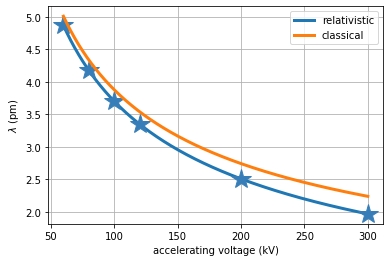

In [18]:
HT = np.linspace(60,300,1000) # high tension range (kV)
selHT=np.array([60.,80.,100.,120.,200.,300.]) # selected HT (kV)
plt.plot(HT,lamb(HT),label="relativistic",lw=3)
plt.plot(selHT,lamb(selHT),'*',markersize=20,color='#377eb8')
plt.plot(HT,lambclass(HT),label="classical",lw=3)
plt.xlabel('accelerating voltage (kV)')
plt.ylabel(r'$\lambda$ (pm)')
plt.grid(True)
plt.legend()
plt.show()

## Electron's velocity compared to light's velocity (in vacuum)

$$\frac{v}{c} = \sqrt{1-\frac{1}{\Big(1+\frac{eE_0}{m_0c^2}\big)^2}}$$

In [19]:
def voverc(Voltage):
    f = Voltage/mecsquared
    voc = np.sqrt(1-1/(1+f)**2)
    return voc

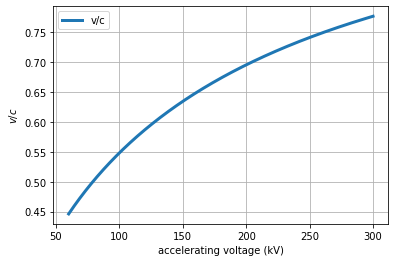

In [23]:
HT = np.linspace(60,300,1000) # high tension range (kV)
selHT=np.array([60.,80.,100.,120.,200.,300.]) # selected HT (kV)
plt.plot(HT,voverc(HT),label="v/c",lw=3)
plt.xlabel('accelerating voltage (kV)')
plt.ylabel(r'$v/c$ ')
plt.grid(True)
plt.legend()
plt.show()

In [24]:
voverc(selHT)

array([0.44622423, 0.50239847, 0.54822043, 0.58667059, 0.69531404,
       0.7765251 ])